In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ci = np.loadtxt("ci_bulk_image_npca30.txt", dtype="str")
ci

array([['BRCA', '0.624', '0.479'],
       ['Lung', '0.549', '0.588'],
       ['Kidney', '0.706', '0.669'],
       ['Brain', '0.787', '0.783'],
       ['HNSC', '0.538', '0.530'],
       ['CESC', '0.646', '0.652']], dtype='<U6')

In [3]:
#cancer_types = ci[:,0]
#print(cancer_types)

In [4]:
cancer_types = ["Breast", "Lung", "Kidney",\
                "Brain", "Head and Neck", "Cervical"]

In [5]:
ci_bulk = ci[:,1].astype(float)
ci_bulk

array([0.624, 0.549, 0.706, 0.787, 0.538, 0.646])

In [6]:
ci_image = ci[:,2].astype(float)
ci_image

array([0.479, 0.588, 0.669, 0.783, 0.53 , 0.652])

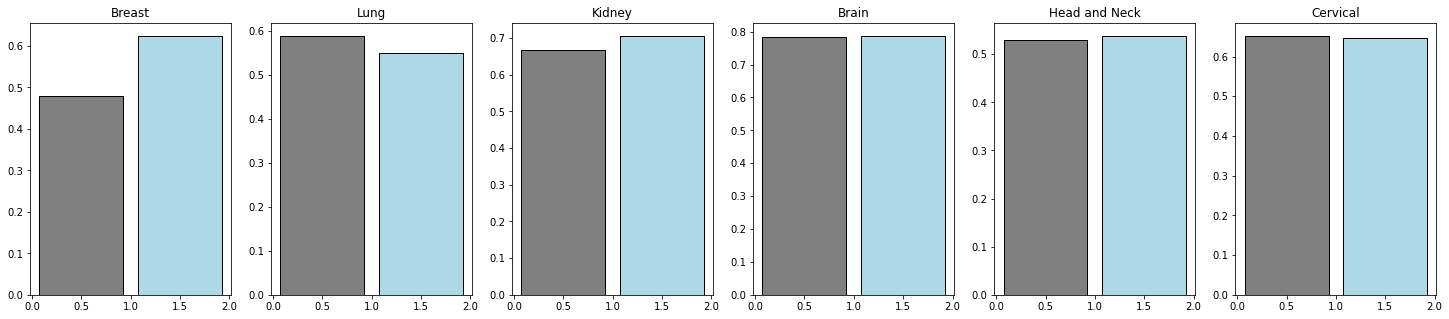

In [7]:
nx,ny = 6,1
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*4.2,ny*5))
   
for i in range(6):
    ax[i].bar(0.5,ci_image[i],color="gray",edgecolor="black",width=0.85)
    ax[i].bar(1.5,ci_bulk[i],color="lightblue",edgecolor="black",width=0.85)

    ax[i].set_title("%s"%cancer_types[i])

#ax[0].set_xticks()
#ax[0].set_xticklabels("Breast")


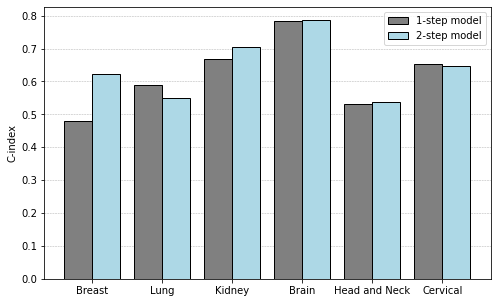

In [8]:
#xvalue = np.arange(m+1)
nx,ny = 1,1
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*8,ny*5))
   
for i in range(6):
    if i == 0:
        ax.bar(i-0.2,ci_image[i],color="gray",edgecolor="black",width=0.4, label="1-step model")
        ax.bar(i+0.2,ci_bulk[i],color="lightblue",edgecolor="black",width=0.4, label="2-step model")
    else:
        ax.bar(i-0.2,ci_image[i],color="gray",edgecolor="black",width=0.4)
        ax.bar(i+0.2,ci_bulk[i],color="lightblue",edgecolor="black",width=0.4)
    #ax[i].set_title("%s"%cancer_types[i])

ax.set_xticks(np.arange(6))
ax.set_xticklabels(cancer_types)
ax.set_ylabel("C-index")
ax.legend()

ax.yaxis.grid(linestyle='--',linewidth='0.5',zorder=-1)
ax.yaxis.set_zorder(level=-1)

plt.savefig('C-index_npca30.pdf', format='pdf', dpi=100)